In [1]:
import pandas as pd
from pandas import *

In [2]:
l = pd.read_csv('../public/data/legs.csv')

In [3]:
l[(l['from'] == 'lls') & (l['to'] == 'zl')]

,from,to,tarif-unit,ix,dist
916,lls,zl,42,916,41.9


In [4]:
df = pd.read_csv('../public/data/data.csv')

In [5]:
df['duration'] = df['arrive'] - df['depart']

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/janwillemtulp/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test', 'unique', 'plotting', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


these are the cumulative number of legs that have increasing number of differences between min and max durations

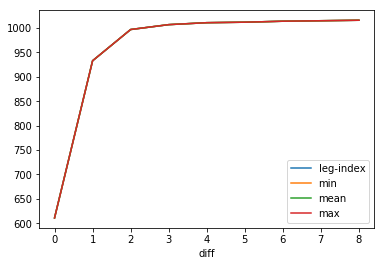

In [17]:
s = df[df['train-id'] != 0][['leg-index', 'duration']] \
    .groupby('leg-index').agg(['min', 'mean', 'max'])['duration'].reset_index()
s['diff'] = s['max'] - s['min']
s[s['diff'] >= 0].groupby('diff').count().cumsum().plot()

Apparently, 3135 legs have trains running always with the same duration, 2080 legs have different durations

In [8]:
s[s['diff'] == 0].size, s[s['diff'] > 0].size

(3055, 2025)

In [10]:
import math

str(int(math.floor(413 / 60))) + ':' + str(413 % 60)

'6:53'

In [11]:
test = df[df['trip-id'] == 7682]
# test['arrive'] = test['arrive'].apply(lambda x: str(int(math.floor(x / 60))) + ':' + str(x % 60))
# test['depart'] = test['depart'].apply(lambda x: str(int(math.floor(x / 60))) + ':' + str(x % 60))
test

,arrive,depart,leg-index,train-id,trip-id,duration
2434,402,399,2.0,3925,7682,3
2605,405,403,5.0,3925,7682,2
2828,412,408,10.0,3925,7682,4
3062,419,413,12.0,3925,7682,6
3444,424,420,26.0,3925,7682,4
3930,454,430,218.0,3925,7682,24
5157,461,455,285.0,3925,7682,6
5599,472,465,637.0,3925,7682,7
6027,492,473,717.0,3925,7682,19
7065,520,494,622.0,3925,7682,26


In [12]:
df[df['leg-index'] == 12]

,arrive,depart,leg-index,train-id,trip-id,duration
12,300,293,12.0,3317,6382,7
148,328,322,12.0,2919,5125,6
654,358,352,12.0,2921,5142,6
1729,389,383,12.0,3923,7670,6
2365,404,398,12.0,4525,8534,6
3062,419,413,12.0,3925,7682,6
3816,434,428,12.0,4527,8537,6
4552,449,443,12.0,3927,7698,6
5262,464,458,12.0,4529,8539,6
6033,479,473,12.0,3929,7709,6


In [13]:
df.groupby(['leg-index']).agg(['min', 'mean', 'max'])['duration']

,min,mean,max
leg-index,,,
0.0,27,30.500000,34
1.0,10,10.475000,22
2.0,2,2.977778,3
3.0,5,5.486726,20
4.0,10,10.025000,11
5.0,2,2.044444,3
6.0,7,7.000000,7
7.0,3,3.000000,3
8.0,6,6.000000,6


In [15]:
df['serie'] = df['train-id'].apply(lambda x: str(x)[:3])
tmp = df.groupby(['leg-index', 'serie']).agg(['min', 'mean', 'max'])['duration']
tmp['dif'] = tmp['max'] - tmp['min']
tmp[tmp['dif'] > 0].sort_values('dif', ascending=False)

,,min,mean,max,dif
leg-index,serie,,,,
0.0,141,27,30.500000,34,7
772.0,118,23,24.500000,29,6
1016.0,141,35,37.500000,40,5
923.0,308,7,7.212121,11,4
617.0,312,11,13.857143,14,3
318.0,122,10,11.500000,13,3
175.0,323,7,7.120000,10,3
702.0,358,5,6.000000,8,3
577.0,667,5,6.200000,7,2


In [20]:
df['dist'] = df['leg-index'].apply(lambda x: l.iloc[int(x)].dist)

In [22]:
df['dist-duration'] = df['dist'] / df['duration']

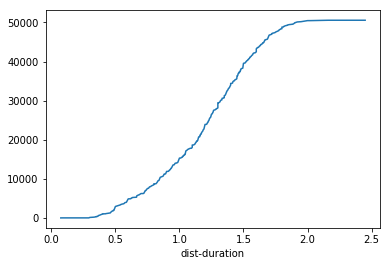

In [28]:
df.groupby('dist-duration').count()['duration'].cumsum().plot()

In [31]:
l.iloc[981]

from          utm
to             ut
tarif-unit     18
ix            981
dist          1.4
Name: 981, dtype: object

In [32]:
df[df['leg-index'] == 981]

,arrive,depart,leg-index,train-id,trip-id,duration,serie,dist,dist-duration
12044,615,596,981.0,28302,18356,19,283,1.4,0.073684
14810,675,656,981.0,28306,18358,19,283,1.4,0.073684
17583,735,716,981.0,28310,18360,19,283,1.4,0.073684
20360,795,776,981.0,28314,18362,19,283,1.4,0.073684
23142,855,836,981.0,28318,18364,19,283,1.4,0.073684
25930,915,896,981.0,28322,18366,19,283,1.4,0.073684
28728,975,956,981.0,28326,18368,19,283,1.4,0.073684
32389,1049,1030,981.0,28330,18371,19,283,1.4,0.073684
